# ML Modeling and Evaluation Notebook

### Objectives:

Fit and evaluate a regression model

### Inputs:

outputs/datasets/cleaned/cleanedDataset.csv

### Outputs:

- Train set (features and target)
- Test set (features and target)
- Data cleaning and Feature Engineering
- Modeling
- Feature importance plot

### Content Duration vs. Engagement & Retention Analysis

Business Case: 
Understanding how content duration affects student retention can help improve course design. If courses with shorter content duration result in higher ratings or more reviews, instructors can be encouraged to optimize their courses for higher engagement. On the other hand, longer courses could be adjusted to ensure students remain engaged throughout the course, potentially boosting course ratings and attracting more subscribers.

- Analyze the relationship between content duration and the number of subscribers, reviews, and ratings.
- Cluster courses into duration categories (short, medium, long) and assess the performance metrics (ratings, reviews, subscribers).
- Provide insights into the optimal course length for higher engagement and retention.

### 1. Import libraries and get the current directory path

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from sklearn.metrics import silhouette_score

# In case you want to go one directory back
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))

### 2. Check the data

In [2]:
df = pd.read_csv(f"outputs/datasets/cleaned/cleanedDataset.csv")

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   int64  
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 344.4+ KB


### 3. Data preprocessing

In [5]:
# Preprocessing
def preprocess_data(df):
    """Converts columns to appropriate datatypes and handles missing values if any."""
    df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
    df['year_published'] = df['published_timestamp'].dt.year
    return df

df = preprocess_data(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   url                  3672 non-null   object             
 3   is_paid              3672 non-null   int64              
 4   price                3672 non-null   int64              
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   object             
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   object             
 12  year_published      

### 4. Exploratory Data Analysis

Summary Statistics:
           course_id      is_paid        price  num_subscribers   num_reviews  \
count  3.672000e+03  3672.000000  3672.000000      3672.000000   3672.000000   
mean   6.758977e+05     0.915577    66.102941      3190.586874    156.371460   
std    3.430720e+05     0.278058    61.035920      9488.105448    936.178649   
min    8.324000e+03     0.000000     0.000000         0.000000      0.000000   
25%    4.077615e+05     1.000000    20.000000       111.750000      4.000000   
50%    6.876920e+05     1.000000    45.000000       912.000000     18.000000   
75%    9.608140e+05     1.000000    95.000000      2548.750000     67.000000   
max    1.282064e+06     1.000000   200.000000    268923.000000  27445.000000   

       num_lectures  content_duration  year_published  
count   3672.000000       3672.000000     3672.000000  
mean      40.140251          4.097603     2015.431100  
std       50.417102          6.057830        1.184731  
min        0.000000          0.000

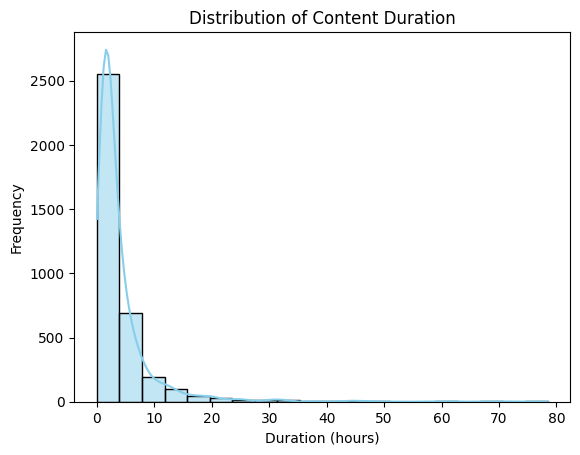

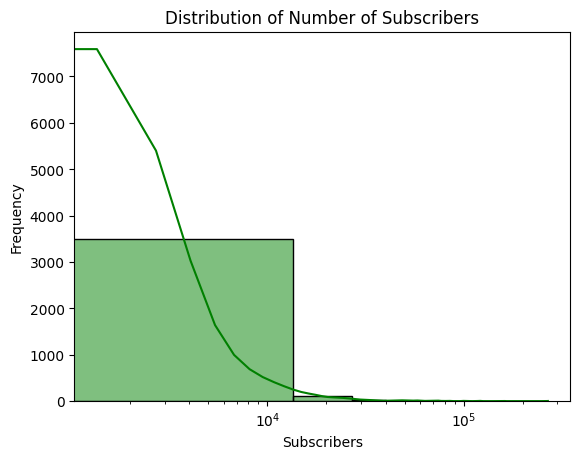

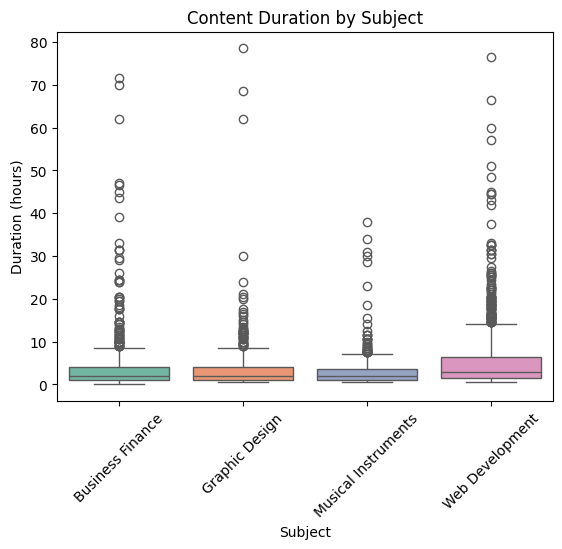

In [8]:
# Exploratory Data Analysis
def explore_data(df):
    """Provides summary statistics and visualizations."""
    print("Summary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())
    
    # Duration distribution
    sns.histplot(df['content_duration'], kde=True, bins=20, color='skyblue')
    plt.title("Distribution of Content Duration")
    plt.xlabel("Duration (hours)")
    plt.ylabel("Frequency")
    plt.show()
    
    # Subscribers distribution
    sns.histplot(df['num_subscribers'], kde=True, bins=20, color='green')
    plt.title("Distribution of Number of Subscribers")
    plt.xlabel("Subscribers")
    plt.ylabel("Frequency")
    plt.xscale('log')  # Log scale to handle skewed distribution
    plt.show()

    # Content duration by subject
    sns.boxplot(x='subject', y='content_duration', data=df, palette='Set2', hue='subject')
    plt.title("Content Duration by Subject")
    plt.xlabel("Subject")
    plt.ylabel("Duration (hours)")
    plt.xticks(rotation=45)
    plt.show()
    return

# Explore data
explore_data(df)

### 5. Clustering courses by content duration

/var/folders/3m/bfnlksbx78d559l3c6pd19_40000gp/T/ipykernel_36092/388221497.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration_category', y='content_duration', data=df, palette='Set3')


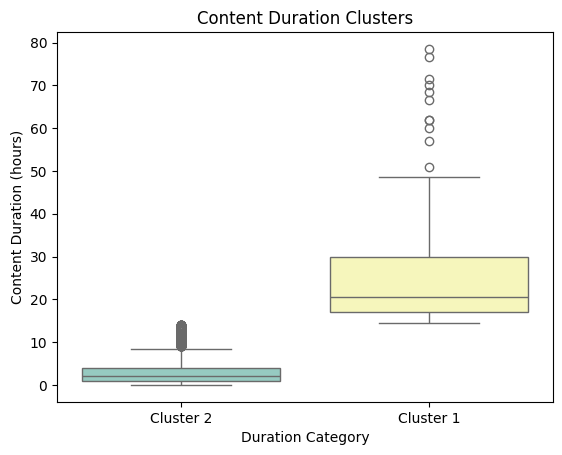

Optimal Number of Clusters: 2


In [13]:
# Clustering courses by content duration
def cluster_courses_by_duration(df):
    """Clusters courses into short, medium, and long categories."""
    # Finding optimal number of clusters using Silhouette Score
    scores = []
    for k in range(2, 6):  # Try clusters from 2 to 5
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df[['content_duration']])
        score = silhouette_score(df[['content_duration']], labels)
        scores.append(score)
    optimal_k = np.argmax(scores) + 2
    
    # Apply clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    df['duration_cluster'] = kmeans.fit_predict(df[['content_duration']])
    
    # Map cluster labels to readable categories
    cluster_mapping = {i: f"Cluster {i+1}" for i in range(optimal_k)}
    df['duration_category'] = df['duration_cluster'].map(cluster_mapping)
    
    # Visualize clusters
    sns.boxplot(x='duration_category', y='content_duration', data=df, palette='Set3')
    plt.title("Content Duration Clusters")
    plt.xlabel("Duration Category")
    plt.ylabel("Content Duration (hours)")
    plt.show()
    print(f"Optimal Number of Clusters: {optimal_k}")
    return df

# Cluster courses by duration
df = cluster_courses_by_duration(df)

### 6. Analyze performance metrics

Performance Metrics by Duration Category:
                   num_subscribers  num_reviews   price
duration_category                                      
Cluster 1                  8989.99      1022.61  130.81
Cluster 2                  2924.65       116.65   63.14


/var/folders/3m/bfnlksbx78d559l3c6pd19_40000gp/T/ipykernel_36092/3354587450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_category', y=metric, data=df, palette='coolwarm')


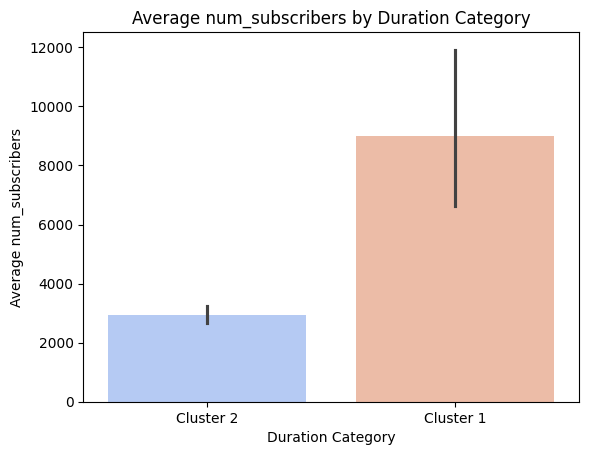

/var/folders/3m/bfnlksbx78d559l3c6pd19_40000gp/T/ipykernel_36092/3354587450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_category', y=metric, data=df, palette='coolwarm')


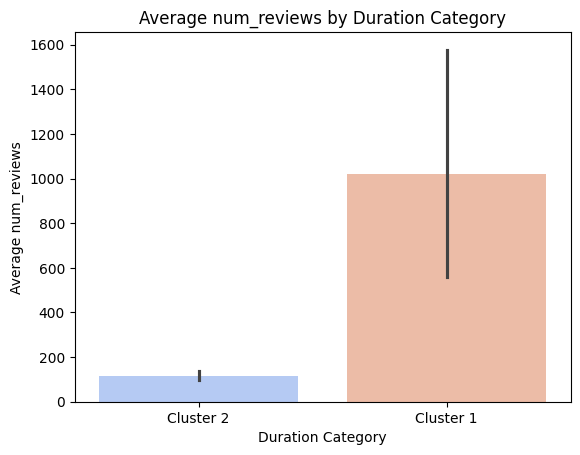

/var/folders/3m/bfnlksbx78d559l3c6pd19_40000gp/T/ipykernel_36092/3354587450.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_category', y=metric, data=df, palette='coolwarm')


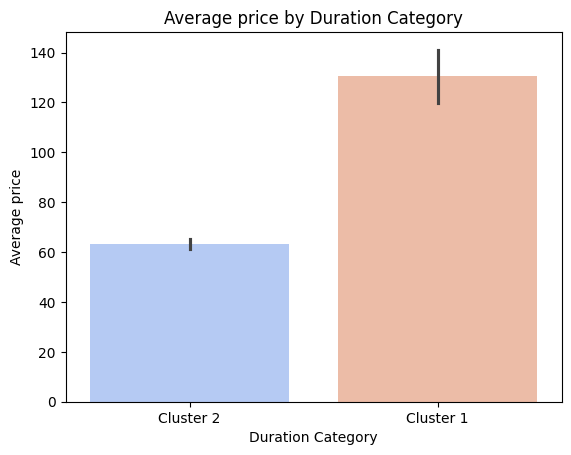

In [19]:
# Analyze performance metrics
def analyze_performance_metrics(df):
    """Analyzes ratings, reviews, and subscribers across duration categories."""
    summary = df.groupby('duration_category')[['num_subscribers', 'num_reviews', 'price']].mean().round(2)
    print("Performance Metrics by Duration Category:")
    print(summary)
    
    # Visualize metrics
    metrics = ['num_subscribers', 'num_reviews', 'price']
    for metric in metrics:
        sns.barplot(x='duration_category', y=metric, data=df, palette='coolwarm')
        plt.title(f"Average {metric} by Duration Category")
        plt.xlabel("Duration Category")
        plt.ylabel(f"Average {metric}")
        plt.show()
    return summary

# Analyze performance metrics
performance_summary = analyze_performance_metrics(df)

### 7. Additional analysis for year-based trends


Yearly Trends in Metrics:
                num_subscribers  num_reviews  content_duration
year_published                                                
2011                   23805.60       808.20             10.20
2012                   12340.87       228.27              6.20
2013                    8358.97       239.10              5.01
2014                    3939.60       176.87              4.47
2015                    3427.34       194.09              3.84
2016                    2463.99       162.32              4.22
2017                    1387.01        46.17              3.57


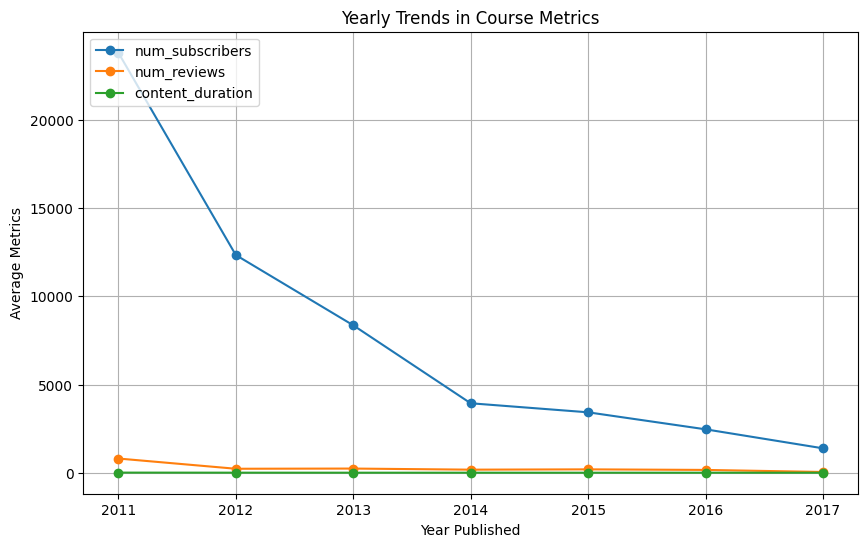

In [17]:
# Additional analysis for year-based trends
def analyze_yearly_trends(df):
    """Examines trends in course metrics over years."""
    yearly_trends = df.groupby('year_published')[['num_subscribers', 'num_reviews', 'content_duration']].mean().round(2)
    print("\nYearly Trends in Metrics:")
    print(yearly_trends)
    
    # Plot trends
    yearly_trends.plot(kind='line', figsize=(10, 6), marker='o')
    plt.title("Yearly Trends in Course Metrics")
    plt.xlabel("Year Published")
    plt.ylabel("Average Metrics")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    return yearly_trends
# Analyze yearly trends
yearly_trends = analyze_yearly_trends(df)

### 8. Hypothesis testing

In [21]:
# Hypothesis testing
def hypothesis_test(df):
    """Conducts ANOVA to determine if there's a significant difference in metrics across clusters."""
    short = df[df['duration_category'] == 'Cluster 1']['num_subscribers']
    medium = df[df['duration_category'] == 'Cluster 2']['num_subscribers']
    long = df[df['duration_category'] == 'Cluster 3']['num_subscribers']
    
    stat, p_value = f_oneway(short, medium, long)
    print(f"\nANOVA Test Statistic: {stat:.2f}, P-Value: {p_value:.5f}")
    if p_value < 0.05:
        print("There is a significant difference in the number of subscribers across duration categories.")
    else:
        print("No significant difference in subscribers across duration categories.")
    return stat, p_value

# Hypothesis testing
hypothesis_test(df)


ANOVA Test Statistic: nan, P-Value: nan
No significant difference in subscribers across duration categories.


/Users/panda/Desktop/code_institue_projects/portfolio-projects/learning_trends_analyzer/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


(np.float64(nan), np.float64(nan))